<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Array_to_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://machinelearningmastery.com/calculate-feature-importance-with-python/ ---> Feature importance bar Graph

-----------------

In [16]:
import numpy as np

In [17]:
numpy_data = np.array([[1, 2], [3, 4]])

df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
df

,column1,column2
row1,1,2
row2,3,4


---------------------------

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("/content/drive/MyDrive/TMLC/Seoul-Bike-Trip-Duration.zip")
train.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [4]:
train.shape

(9601139, 26)

In [5]:
# Dropping irrelevant column from the dataset i.e Unnamed: 0
train.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
train = train.loc[0:100000, :]
print(train.head())
print(train.shape)

   Duration  Distance      PLong       PLatd  ...  Solar  Snow  GroundTemp  Dust
0         3        50  37.544666  126.888359  ...    0.0   0.0        -2.2  25.0
1        24      7670  37.506199  127.003944  ...    0.0   0.0        -2.2  25.0
2         8      1390  37.544590  127.057083  ...    0.0   0.0        -2.2  25.0
3         8      1820  37.571102  127.023560  ...    0.0   0.0        -2.2  25.0
4         4       850  37.573242  127.015907  ...    0.0   0.0        -2.2  25.0

[5 rows x 25 columns]
(100001, 25)


In [7]:
# Splitting data into Labels and target
X = train.drop('Duration', axis=1)
y = train['Duration']

In [8]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

In [10]:
LR.coef_

array([ 4.19415088e-04, -2.59036936e+00,  3.12694387e-01,  2.64944982e+00,
       -9.11920926e-02, -7.60795337e-02, -1.13425713e-10, -1.27061928e+03,
       -5.30040356e+01, -8.83247788e-01,  3.58149458e-01, -2.04636308e-12,
        1.27062339e+03,  5.30162963e+01,  8.83047812e-01, -3.47813595e-01,
        1.20306143e-02,  8.85884505e-01, -5.43552603e-02, -4.29226609e-03,
        4.46115940e-01,  6.46507798e-02,  6.49206385e-03,  1.27946585e-03])

In [35]:
feature_importance = pd.DataFrame(LR.coef_, index=X.columns).sort_values(0, ascending=True)
feature_importance

,0
Pday,-1.270619e+03
Phour,-5.300404e+01
PLong,-2.590369e+00
Pmin,-8.832478e-01
DDweek,-3.478136e-01
DLatd,-9.119209e-02
Haversine,-7.607953e-02
Wind,-5.435526e-02
Humid,-4.292266e-03
Pmonth,-1.134257e-10


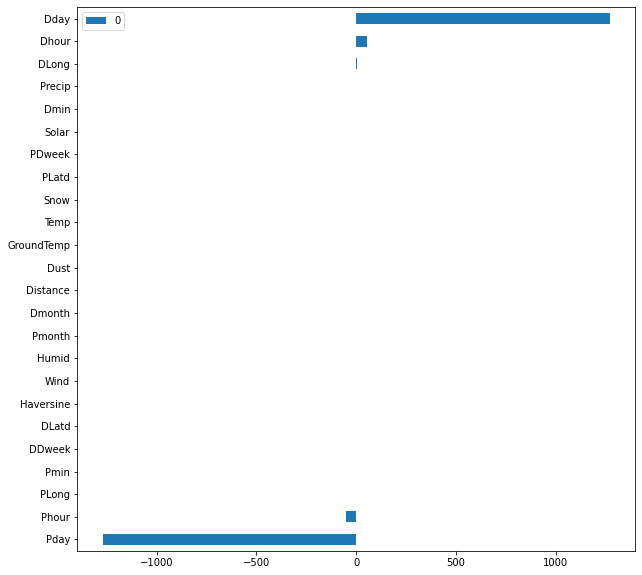

In [38]:
feature_importance.plot(kind='barh', figsize=(10,10))

----------------

Feature: 0, Score: 0.00042
Feature: 1, Score: -2.59037
Feature: 2, Score: 0.31269
Feature: 3, Score: 2.64945
Feature: 4, Score: -0.09119
Feature: 5, Score: -0.07608
Feature: 6, Score: -0.00000
Feature: 7, Score: -1270.61928
Feature: 8, Score: -53.00404
Feature: 9, Score: -0.88325
Feature: 10, Score: 0.35815
Feature: 11, Score: -0.00000
Feature: 12, Score: 1270.62339
Feature: 13, Score: 53.01630
Feature: 14, Score: 0.88305
Feature: 15, Score: -0.34781
Feature: 16, Score: 0.01203
Feature: 17, Score: 0.88588
Feature: 18, Score: -0.05436
Feature: 19, Score: -0.00429
Feature: 20, Score: 0.44612
Feature: 21, Score: 0.06465
Feature: 22, Score: 0.00649
Feature: 23, Score: 0.00128


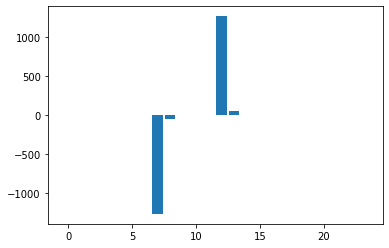

In [39]:
# get importance
importance = LR.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()